# 深度学习基础3_多层感知机   

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

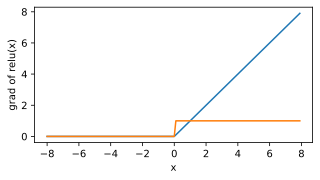

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu() #x.sigmoid/x.tanh
xyplot(x, y, 'relu')

# 求和后进行导数
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

## 3.9 多层感知机从0实现

In [3]:
# 读取fashion_mnist

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)    

# 定义模型参数 
# 隐藏层神经元个数:256  
num_inputs,num_outputs,num_hiddens = 28*28,10,256

W1 = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_hiddens)),dtype = torch.float)
b1 = torch.zeros(num_hiddens,dtype = torch.float)
W2 = torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_outputs)),dtype = torch.float)
b2 = torch.zeros(num_outputs,dtype = torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad = True)


# 定义激活函数   
def relu(X):
    return torch.max(input = X,other = torch.tensor(0.0))

# 定义模型 
def net(X):
    X = X.view((-1,num_inputs))
    H = relu(torch.matmul(X,W1)+b1)
    return torch.matmul(H,W2)+b2

# 定义损失函数  
loss = torch.nn.CrossEntropyLoss()

D:\Anaconda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
num_epochs, lr = 3, 100.0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0031, train acc 0.712, test acc 0.000, epoch time 5.3303
epoch 2, loss 0.0019, train acc 0.822, test acc 0.000, epoch time 5.3481
epoch 3, loss 0.0017, train acc 0.845, test acc 0.000, epoch time 5.3899


## 多层感知机的简洁实现

In [5]:
from torch import nn
from torch.nn import init
net = nn.Sequential(
    d2l.FlattenLayer(),
    nn.Linear(num_inputs,num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens,num_outputs)
    )
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)


batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.704, test acc 0.000, epoch time 5.4200
epoch 2, loss 0.0019, train acc 0.822, test acc 0.000, epoch time 5.4757
epoch 3, loss 0.0017, train acc 0.843, test acc 0.000, epoch time 5.5585
epoch 4, loss 0.0015, train acc 0.857, test acc 0.000, epoch time 5.4740
epoch 5, loss 0.0014, train acc 0.865, test acc 0.000, epoch time 5.5815
